기본적으로 데이터를 다루기 위해서는 데이터를 먼저 파악해야한다.

1. 데이터를 왜 잘 다루어야 할까?
=> 기본적으로 데이터 분석 및 머신러닝을 하기 위해서는 모델을 파악할 줄 알아야한다. 하지만 모델을 파악하기 위해서 데이터를 어떻게 다루어야하는지가 가장 중요하다 A모델에 적합한 데이터를 처리해야하고 B모델에 적합한 데이터를 처리해야한다. 모델에 아무 데이터나 넣으면 안된다는 뜻이 된다.

데이터를 다루기위한 도구들로는 크게 3가지로 나눌 수 있다.
1. 통계
2. 확률
3. 선형대수학

이렇게 3가지를 다뤄야 한다.

# 1. 통계

만약 데이터가 학생들의 시험점수라고 가정해보자 3명의 학생이 5과목을 봤다. 만약 가장 잘본 학생을 고르라고 하면 어떻게 할 것인가?
데이터가 만약 극명나게 차이나면 우리 눈으로 쉽게 이해 할 수 있을 것이다. 하지만 우리가 성적이 봐도 비슷하다면 어떻게 판단할 것인가?
우리는 넘파이 라이브러리를 이용하여 다양한 함수를 통해 접근하도록 하자.

In [1]:
import numpy as np

student_1 = np.array([75,55,70,90,100])
student_2 = np.array([85,65,90,70,90])
student_3 = np.array([90,70,65,75,95])

첫번째 접근 : 데이터의 중심값이 높은경우로 판단
중심값을 어떻게 판단해야 할까? 
1. 평균 접근
2. 중앙값 판단
3. 최빈값 판단

In [3]:
# 평균값 판단 
average_1 = np.sum(student_1) / len(student_1)
average_2 = np.sum(student_2) / len(student_2)
average_3 = np.sum(student_3) / len(student_3)

print(average_1,average_2,average_3)

# 중앙값 판단
median_1 = np.sort(student_1)
median_1 = median_1[len(student_1)//2]
median_2 = np.sort(student_2)
median_2 = median_2[len(student_2)//2]
median_3 = np.sort(student_3)
median_3 = median_3[len(student_3)//2]

print(median_1,median_2,median_3)

# 최빈값 판단

mode_1 = np.bincount(student_1).argmax()
mode_2 = np.bincount(student_2).argmax()
mode_3 = np.bincount(student_3).argmax()

print(mode_1,mode_2,mode_3)

80.0 80.0 79.0
80 85 75
55 90 65


##### 위와 같은 방법은 데이터에서의 어떤 성향을 가지고 있는지만 알뿐(성적이 높다, 낮다) 변화량에대해서는 감지하기가 힘들다.
데이터 시각화를 통해 데이터를 분석하는 방법이 좋다.

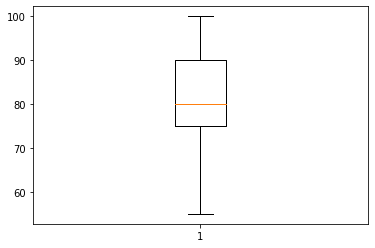

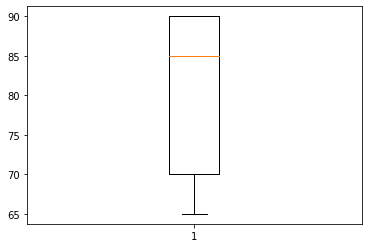

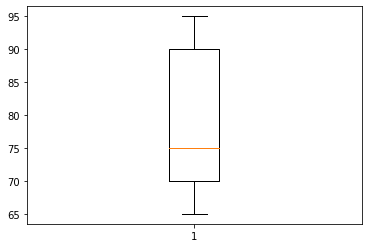

In [23]:
import matplotlib.pyplot as plt

plt.subplot(111)
plt.boxplot(student_1)
plt.show()
plt.subplot(111)
plt.boxplot(student_2)
plt.show()
plt.subplot(111)
plt.boxplot(student_3)
plt.show()
# 맨위 값은 최댓값 맨 아랫값은 최솟값 주황색 선은 중앙값 박스의 아래는 IQR에서 Q1 위는 Q3에 해당한다.

데이터를 시각화진행과정을 통해서 누구라도 쉽게 파악할 수 있다. 하지만 위 데이터 시각화를 통해서 데이터의 변화량을 알 수가 없다.

##### 두번째 접근 : 데이터 변화값이 안정적인 것
1. 분산 접근법
2. 표준편차 접근법

분산은 변화의 정도를 나타낸다. 아까 데이터를 이용하여 분산과 표준편차를 구해보도록 한다.
분산,표준편차가 클수록 변화량이 크다는 이야기이다.

In [27]:
student1_var = np.var(student_1)
student2_var = np.var(student_2)
student3_var = np.var(student_3)
student1_std = np.std(student_1)
student2_std = np.std(student_2)
student3_std = np.std(student_3)
print("각 학생들의 분산")
print("student1 :" , student1_var)
print("student2 :" , student2_var)
print("student3 :" , student3_var)
print("각 학생들의 표준편차")
print("student1 :" , student1_std)
print("student2 :" , student2_std)
print("student3 :" , student3_std)

각 학생들의 분산
student1 : 230.0
student2 : 110.0
student3 : 134.0
각 학생들의 표준편차
student1 : 15.165750888103101
student2 : 10.488088481701515
student3 : 11.575836902790225


통계가 왜 중요할까?
=> 데이터를 파악하는데 있어서 핵심적이라고 할 수 있다 평균과 최댓값 들을 통해 우리가 예측할 수 있는 범위를 좁혀지게 해줄 수 있기 때문이다.
통계가 어디서 많이쓰일까?
=> 데이터의 만약 결측값이 존재하게 된다면 어떠한 값으로 메우는 경우가 발생할 수 있다. 그럴때 평균,분산,표준편차등을 이용하여 예측값을 
나타낼 수있기 때문이다.

# 2. 확률

데이터를 다루기위한 도구로써 2번째는 확률에 해당한다.
통계는 데이터의 경향을 나타냈다면 확률은 가능성에 초점을 맞춘다.
어떠한 사건이 일어날 확률 이것을 구한다.

사건 : Event
확률 : Probability

##### 확률의 정의 : 사건이 일어날 가능성을 숫자로 묘사한 것이라고 할 수 있다.

확률은 대체로 공간 => 사건 => 확률 이 순서로 진행한다.

예시를 들어서 설명하겠다. 

동전은 흔히 앞면 뒷면 이렇게 이루어져 있다 내가 동전을 던졌을 때 앞면이 나올 확률이라고 생각해 보았을때

사건은 동전을 던진것이고 확률은 이게 앞면이 나올 가능성을 의미한다. 

데이터에 기반한 확률을 공식으로 나타나게 되면

##### A사건이 일어날 확률 = A가 일어난 경우 / 전체 경우

이렇게 구할 수 있다. 숫자로 나타내면 확률은 0과 1사이 값으로 정의된다. 

하지만 데이터에 기반하지 않는 확률도 존재한다.

이러한 확률값을 사전 확률이라고 한다.

##### 사전 확률 : 데이터가 없어도 가능성에 대해서 값을 부여할 수 있는 경우

동전 예시를 이어서 들어보면 뒷면이 나올확률을 부여할 수 있는것이다. 앞면의 데이터가 존재하기 때문에 뒷면의 데이터의 확률을 부여할 수 있다.

2개, 즉 복수사건에 대해서도 데이터를 구할 수 있다. 조건부 확률이라는 것이 존재한다.

조건부 확률 : A라는 사건이 실행한다면 B가 일어날 확률을 뜻한다. 즉 A는 B가 발생하기위한 조건이 된다.

기호로는 P(B|A) 이렇게 나타낼 수 있다.


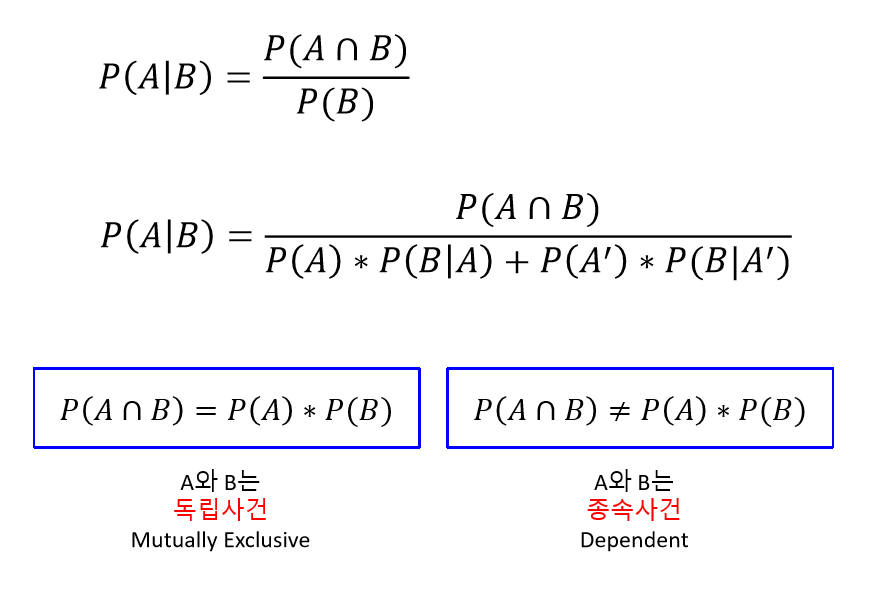

또한 확률을 분포를 통해서 나타낼 수 있다.

확률분포의 정의 : 각 사건에 대한 확률을 분포형태(히스토그램이나 곡선분포)로 나타낸 것

구하는 방법 : 사건에 대하여 기록하고 전체 사건에 대비 일어난 횟수를 구한 다음 확률을 나타낸다.
    
특정 종류의 데이터를 패턴화 시킬수 있다는 장점을 가지고 있다.

##### 확률 분포에는 2가지로 나눌수 있다.

이산분포

- Binomal, poisson

연속분포

- Normal, Gaussian

이산분포와 연속분포의 차이를 알기위해서 시각화를 통해 보도록하자.

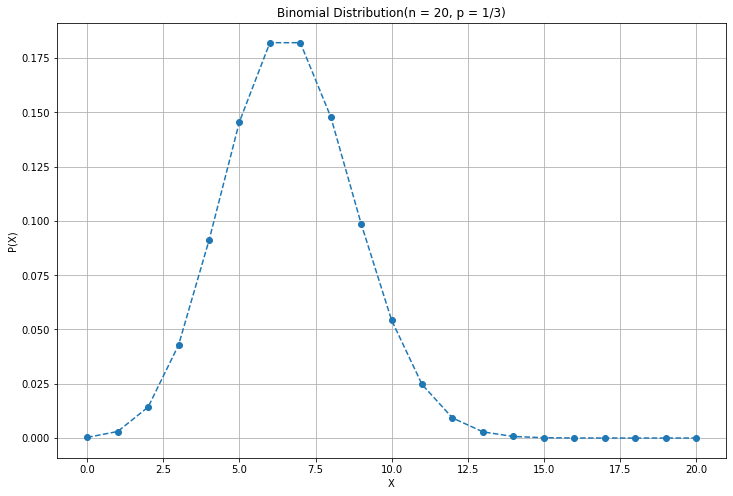

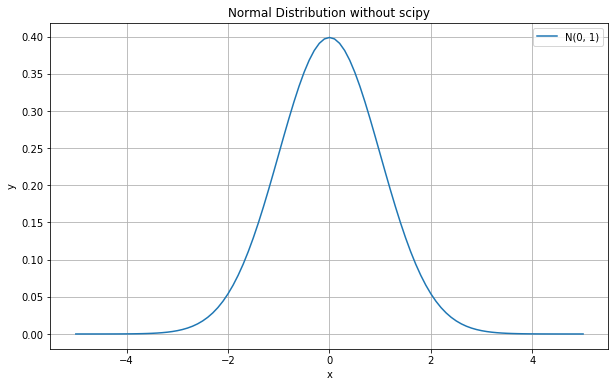

In [32]:
from scipy.special import factorial,comb
n = 20
x = np.arange(21)
p = 1 / 3
y = comb(n, x) * p ** x * (1 - p) ** (n - x)

# 이항분포 공식 이용

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'o--')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Binomial Distribution(n = 20, p = 1/3)')
plt.grid()
plt.show()

x = np.linspace(-5, 5, 101)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(- x ** 2 / 2 )

# 가우시안 분포
plt.figure(figsize=(10, 6))         
plt.plot(x, y)                       
plt.xlabel("x")                      
plt.ylabel("y")                      
plt.grid()                           
plt.title("Normal Distribution without scipy")     
plt.legend(["N(0, 1)"])              
plt.show()                           

# 선형대수학

지금까지 확률과 통계에 대해서 설명하고 시각화까지 나타내었다. 3번째 데이터를 다루는 도구인 선형대수에 대해서 설명한다.

#### Linear Algebra

선형대수에서 핵심은 벡터이다 우리는 정보를 벡터에 담아서 표현하기 때문이다.

그럼 정보라는 것은 무엇일까?

=> 정보는 우리가 원하는 내용이 담겨있는 것이라고 표현할 수 있다. 특징들이 있고 정보를 통해 우리가 신호를 주고 받을 수도 있다.

데이터 공간쪽에서는 정보를 벡터형태로 나타낸다 A라는 정보는 벡터형태로 되어있다.

표현방법은 Component로 표시한다.

    2차원 벡터를 넘파이형태로 나타내보자.

In [38]:
two_component = np.array([[32],
                          [24]])
# 2차원 벡터 형태를 가진 변수

[[32]
 [24]]


벡터는 2차원,3차원, 다차원 형태로 나타낸다 우리는 벡터의 원소들을 가지고 정보를 파악한다.

#### 벡터의 연산

v라는 벡터와 w라는 벡터가 존재한다 이 두 벡터의 연산에 대해서 코드를 작성하면

In [44]:
v = np.array([[32],
              [24]])
w = np.array([[44],
              [32]])

print(v + w)
print(v - w)

# 덧셈 연산 뺄셈 연산

print(2 * v)

# scalar 연산

print(v * w)

# 곱셈 연산


[[76]
 [56]]
[[-12]
 [ -8]]
[[64]
 [48]]
[[1408]
 [ 768]]


벡터에서 가장 중요한 개념은 내적이다. 내적은 아래 사진처럼 그냥 곱하는 것이 아니라 행과 열의 곱으로 값을 누적시켜 구한 값이다.
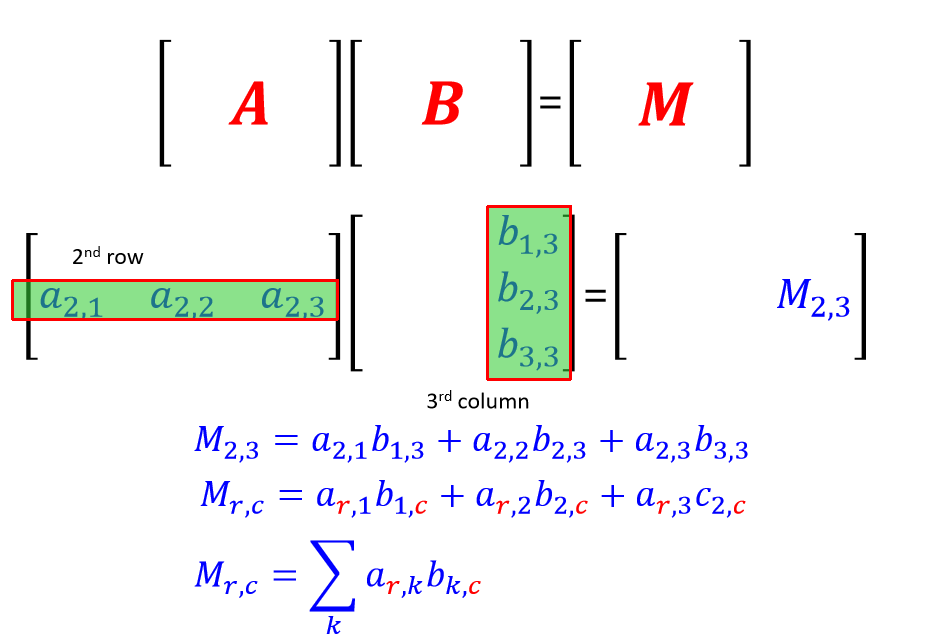


벡터의 내적에서 가장 중요한 것은 내적을 진행할 때에 앞의 행렬의 열값과 뒤의 행렬의 행값이 일치해야 한다 내적을 진행하면 배열의 형태도 달라지게 된다.
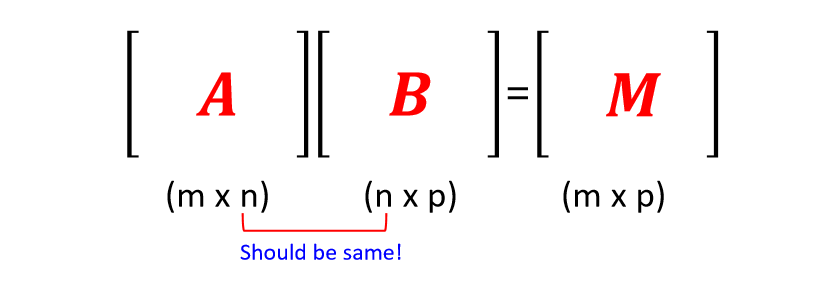

In [56]:
v1 = np.array([[1,2,3],[3,4,2]])
v2 = np.array([[2,4],[4,6],[3,4]])

print(v1.shape)
print(v2.shape)
print(np.dot(v1,v2))
# 내적 연산

(2, 3)
(3, 2)
[[19 28]
 [28 44]]


# 핵심 아이디어

이번 주제는 데이터 머신러닝을 이해하기 위해서 가장 기본적으로 필수적으로 알아야 할 것들에 대해서 배웠다.

통계와 확률, 선형대수에 대해서 기술하였다. 주요 패키지는 넘파이와 매트랩 라이브러리를 이용하였다.

넘파이 : 배열 라이브러리

매트랩 : 시각화 라이브러리